In [2]:
import json
from datetime import datetime

from datasets import load_dataset
import numpy as np
import matplotlib.pyplot as plt

import config

/home/gabriel/miniconda3/envs/rome/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [22]:
def load_data(name):
    return load_dataset(config.DATA_PATH+"/"+name, split="train")

def print_distributions(dataset, column_names):
    print("Features:", list(dataset.features.keys()))
    print("Number of samples:", dataset.num_rows)
    print("Sample:", json.dumps(dataset[-1], indent=4, sort_keys=True))

    for column_name in column_names:
        if dataset.features[column_name].dtype == "string":
            lengths = [len(x) for x in dataset[column_name] if x is not None]
            plt.figure(figsize=(20, 5))
            plt.hist(lengths, bins=min(len(set(lengths)), 1000))
            plt.title(column_name + " length distribution")
            plt.show()
            if sum(lengths) < 10000000:
                unique_values = np.unique(dataset[column_name], return_counts=True)
                print(f"There are {len(unique_values[0])} {column_name}.")
                if len(unique_values[0]) < 100:
                    plt.figure(figsize=(20, 5))
                    plt.bar(unique_values[0], unique_values[1])
                    plt.xticks(rotation='vertical')
                else:
                    continue
            else:
                continue
        else:
            plt.figure(figsize=(20, 5))
            plt.hist([x for x in dataset[column_name] if x is not None], bins=1000)
        plt.title(column_name + " distribution")
        plt.show()

def count_none(dataset, column_name):
    print(f"Number of 'None' {column_name}: {sum([x is None for x in dataset[column_name]])}")

### AM-Deepseek-Distill

In [3]:
am_deepseek_distill = load_data("AM-DeepSeek-Distilled-40M")

FileNotFoundError: Couldn't find any data file at /home/gabriel/git/French-Math-Data/Data/AM-DeepSeek-Distilled-40M.

### BigMath

Features: ['problem', 'answer', 'source', 'domain', 'llama8b_solve_rate']
Number of samples: 251122
Sample: {
    "answer": "1",
    "domain": [
        "Mathematics -> Algebra -> Algebraic Expressions -> Other"
    ],
    "llama8b_solve_rate": 0.15625,
    "problem": "Find the sum of the numerical coefficients of all the terms in the expansion of $(x-2y)^{18}$. Express your answer as a single integer.",
    "source": "big_math"
}


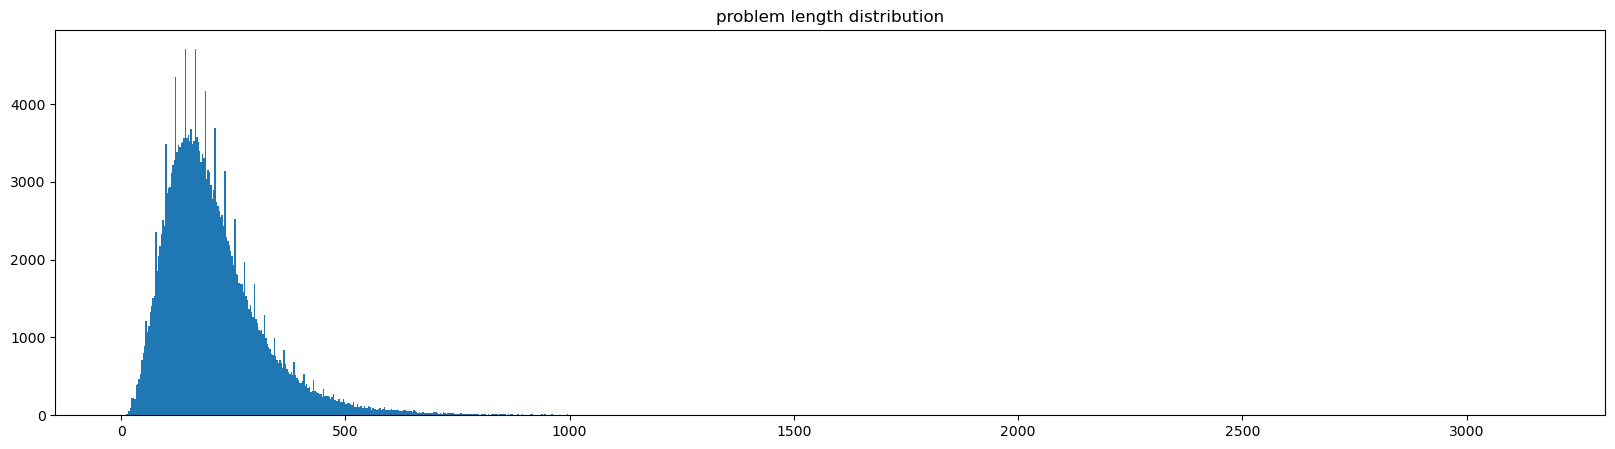

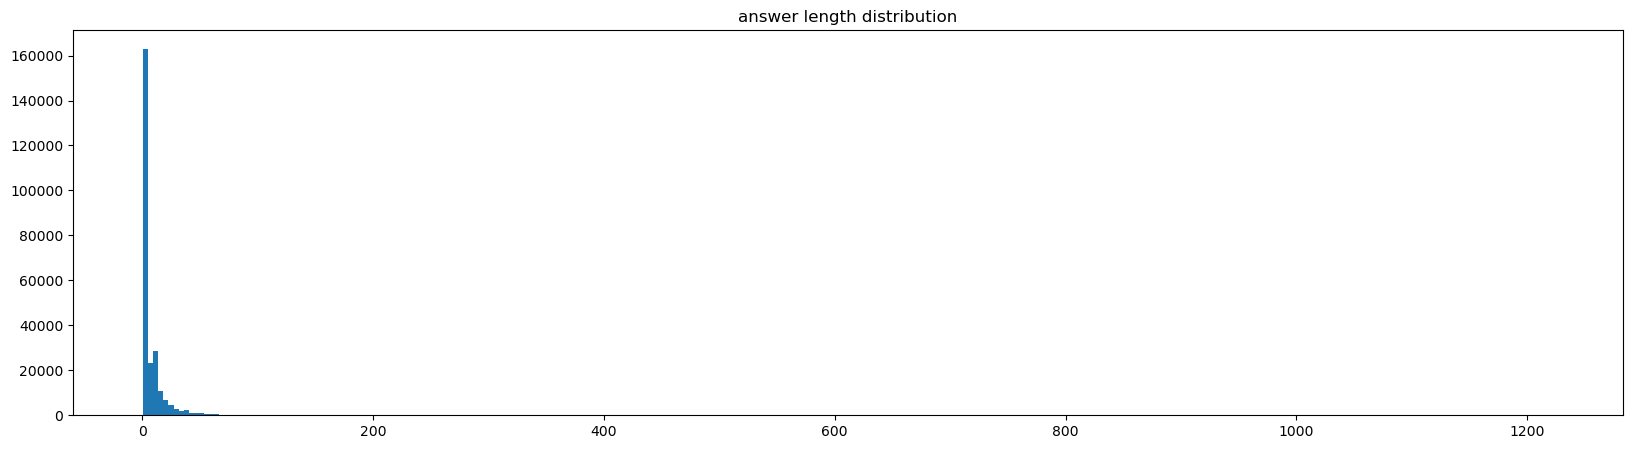

There are 61941 answer.


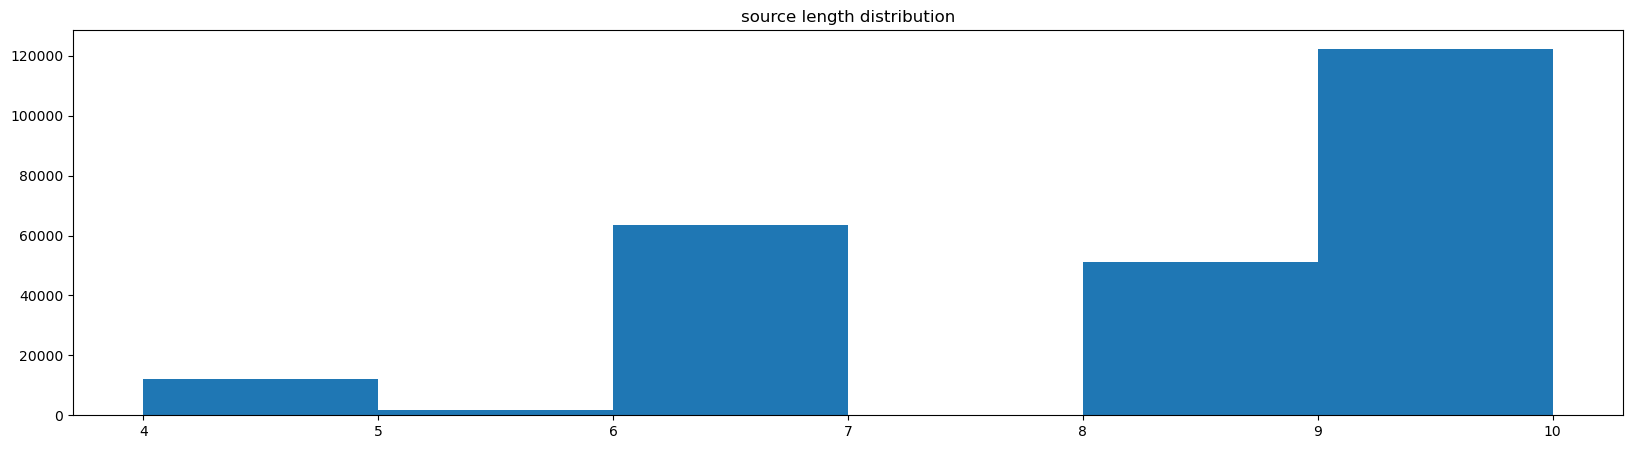

There are 11 source.


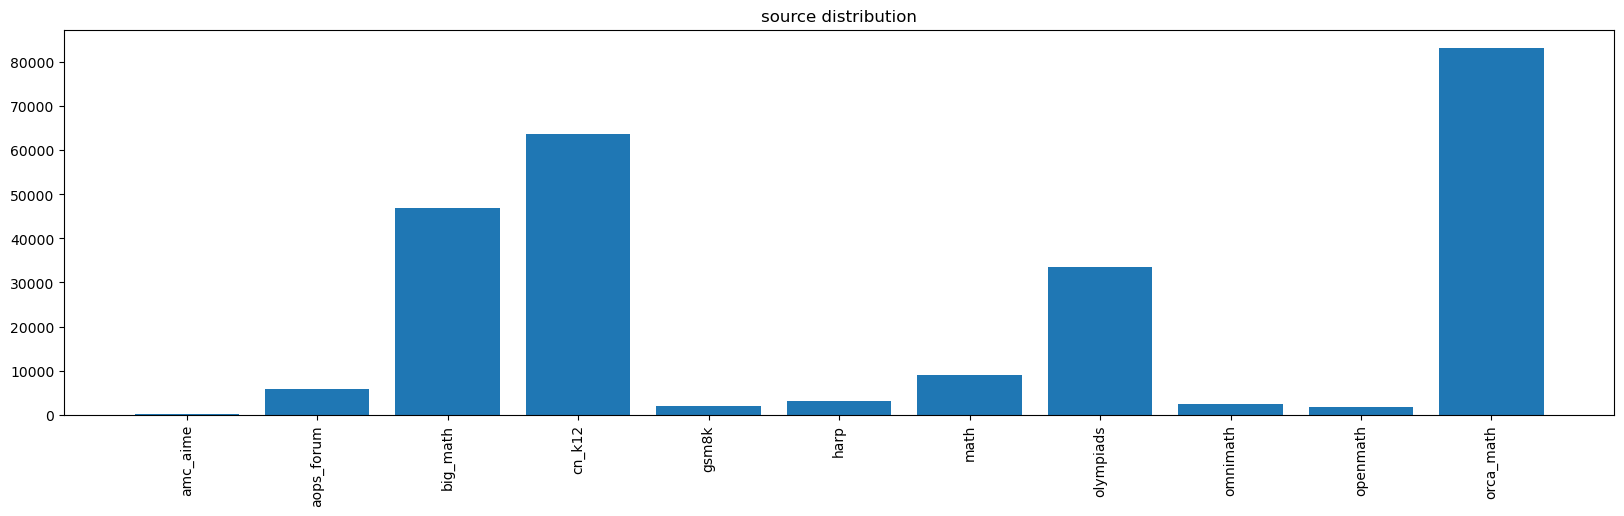

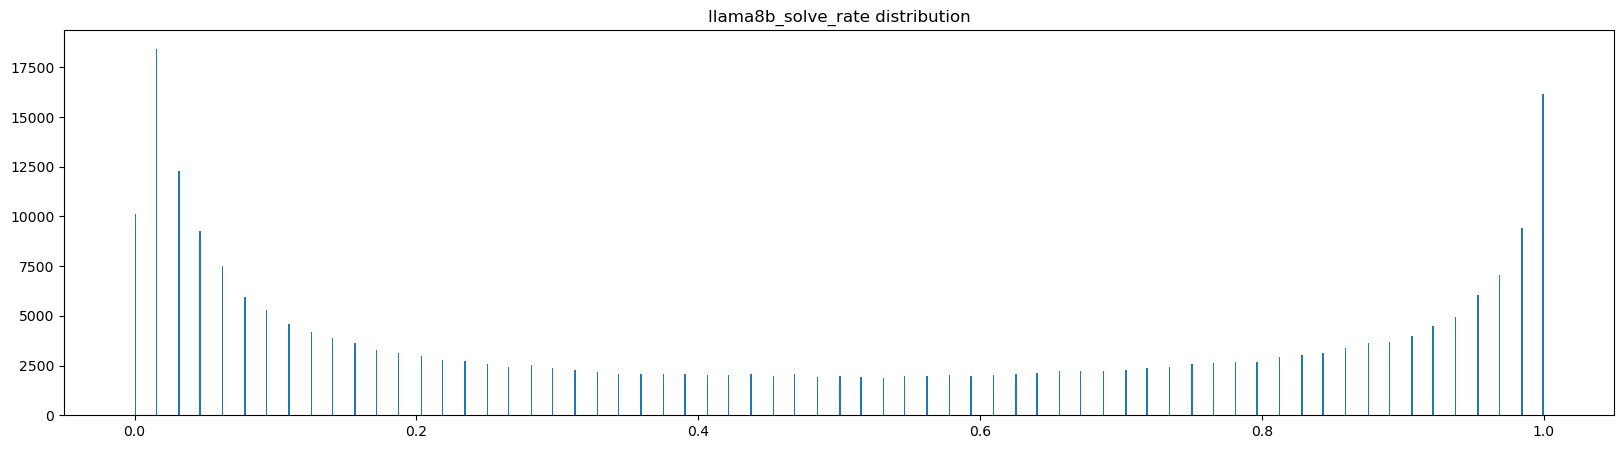

There are 637 domain


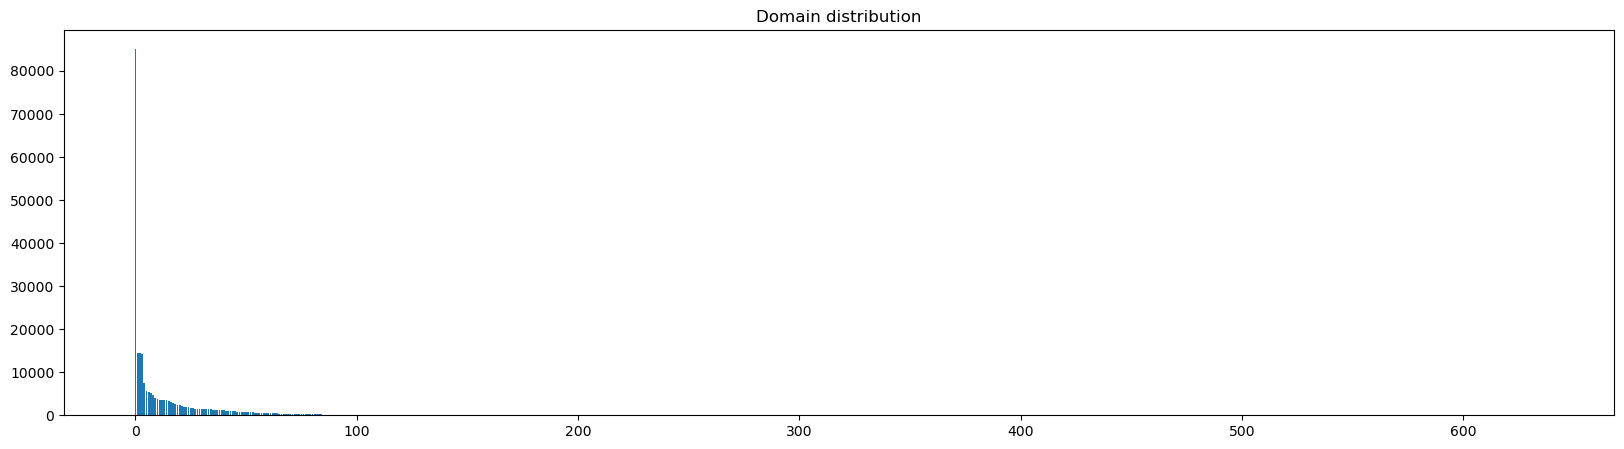

Number of 'None' llama8b_solve_rate: 4


In [23]:
big_math = load_data("Big-Math-RL-Verified")
print_distributions(big_math, ['problem', 'answer', 'source', 'llama8b_solve_rate'])

domains = np.unique([domain for domains in big_math["domain"] for domain in domains], return_counts=True)
print(f"There are {len(domains[0])} domain")
plt.figure(figsize=(20, 5))
plt.bar(range(len(domains[1])), sorted(domains[1], reverse=True))
plt.title("Domain distribution")
plt.show()

count_none(big_math, "llama8b_solve_rate")

### Llama-Nemotron

In [ ]:
llama_nemotron = load_data("Llama-Nemotron-Post-Training-Dataset")

### MegaMath-Web-Pro

Features: ['text', 'cc-path', 'domain', 'lang', 'lang_score', 'timestamp', 'url', 'math_score', 'timestamp_unformatted']
Number of samples: 163968
Sample: {
    "cc-path": "CC-MAIN-2024-38/segments/1725700651682.69/warc/CC-MAIN-20240916080220-20240916110220-00716.warc.gz",
    "domain": "wikidoc.org",
    "lang": "en",
    "lang_score": 0.7885941863059998,
    "math_score": 0.9914684891700745,
    "text": "# Scientific Notation\n\nScientific notation is a way of writing numbers that accommodates values too large or small to be conveniently written in standard decimal notation. It has a number of useful properties and is often favored by scientists, mathematicians, and engineers.\n\n## Form of Scientific Notation\n\nIn scientific notation, numbers are written in the form: $a \\times 10^b$, where the exponent $b$ is an integer, and the coefficient $a$ is any real number, called the significand or mantissa.\n\n## Normalized Notation\n\nAny given number can be written in the form $a \\time

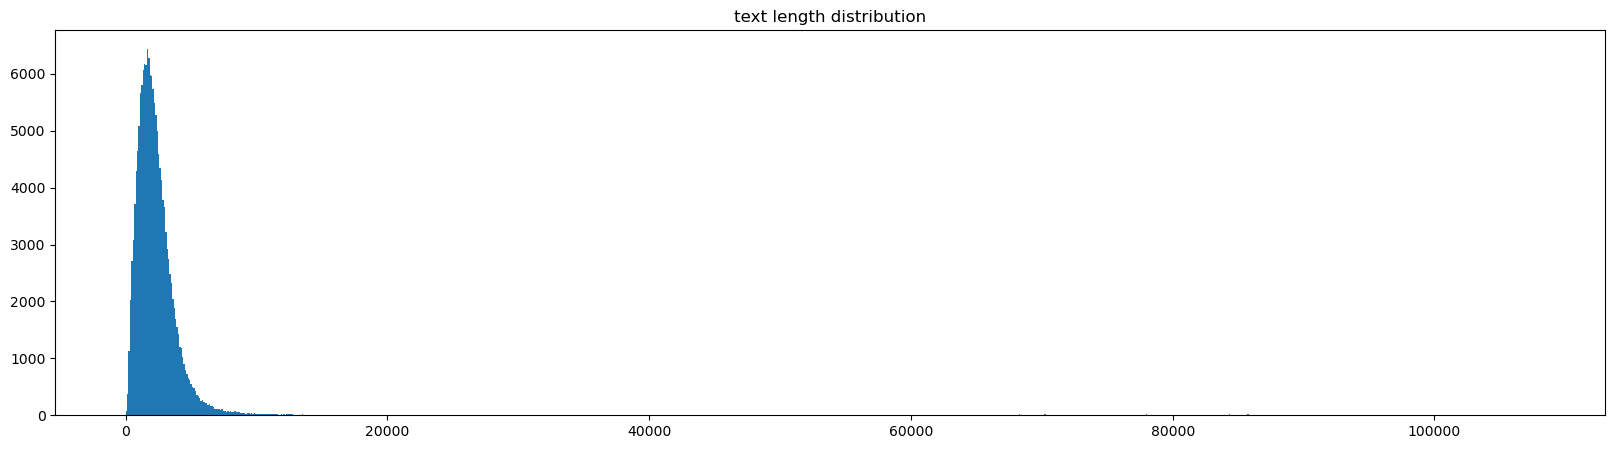

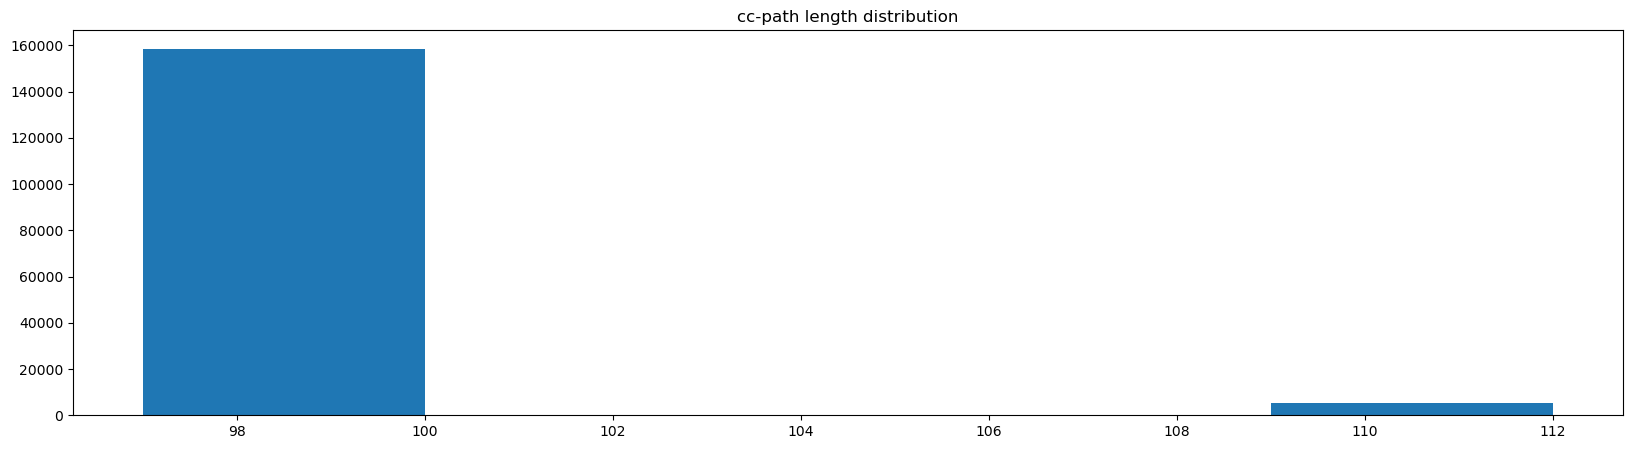

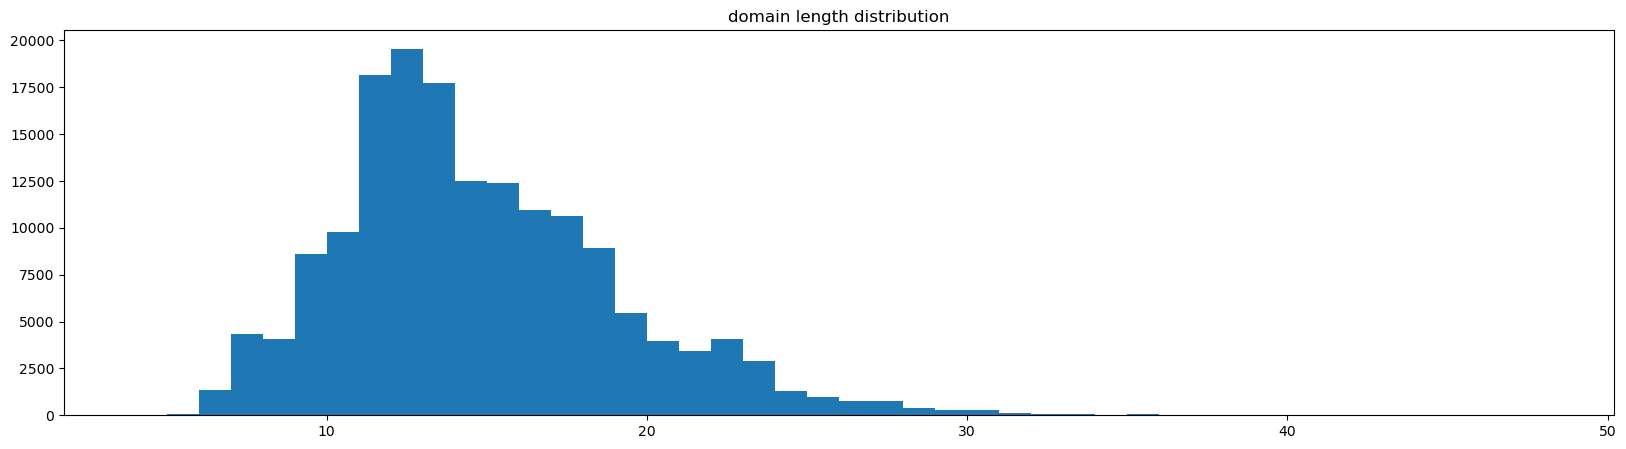

There are 33910 domain.


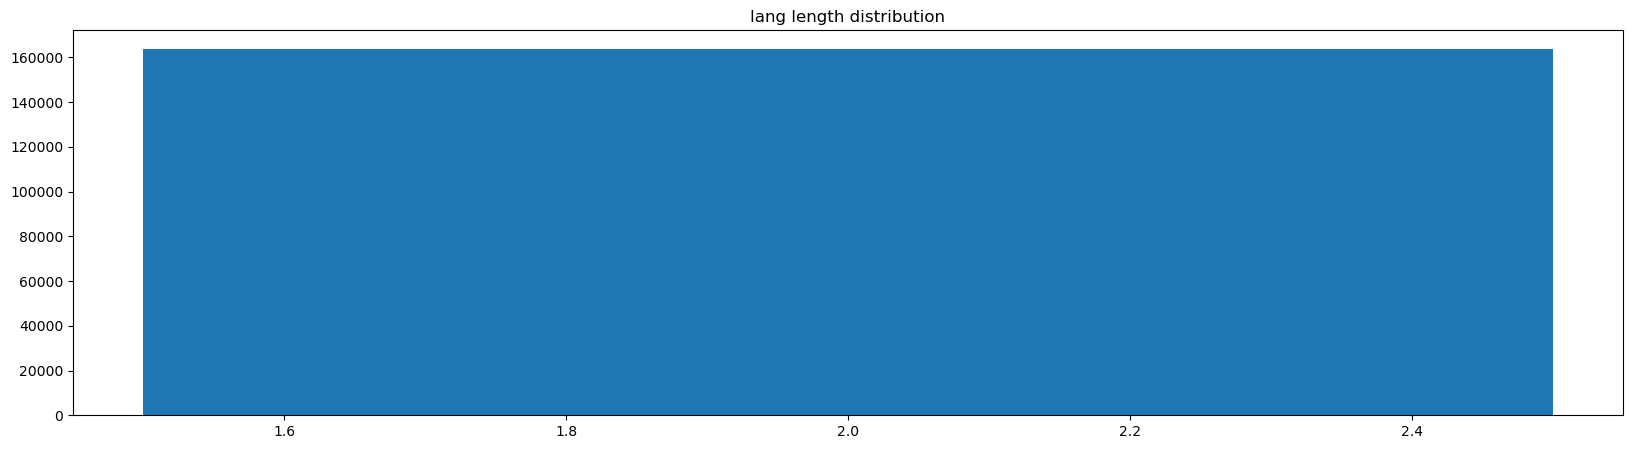

There are 1 lang.


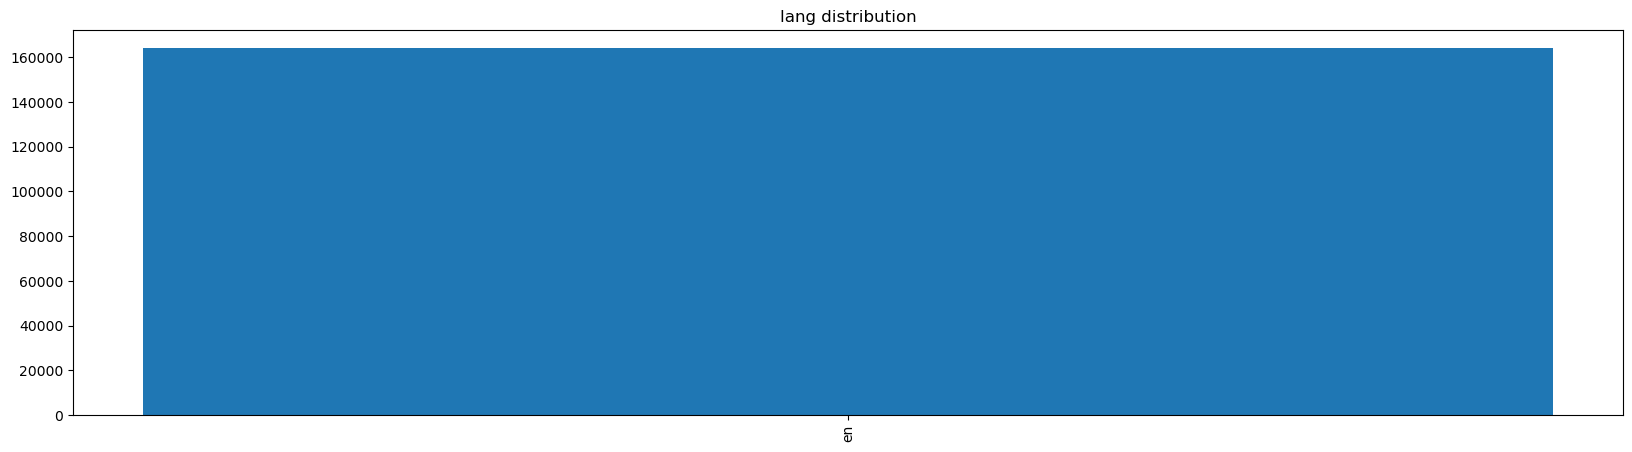

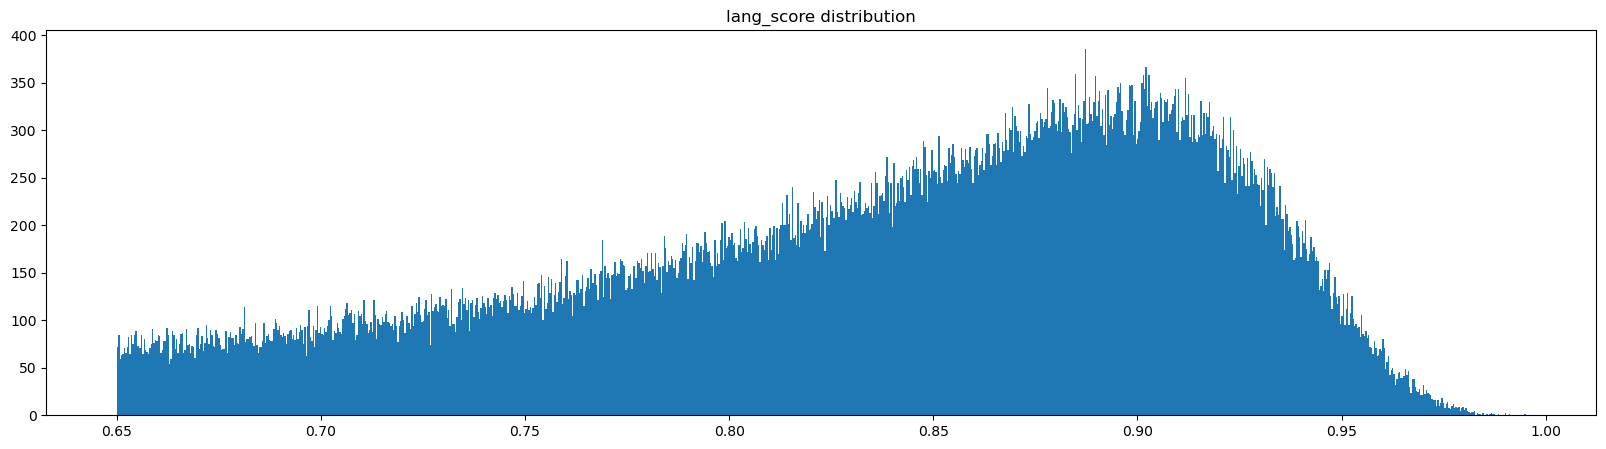

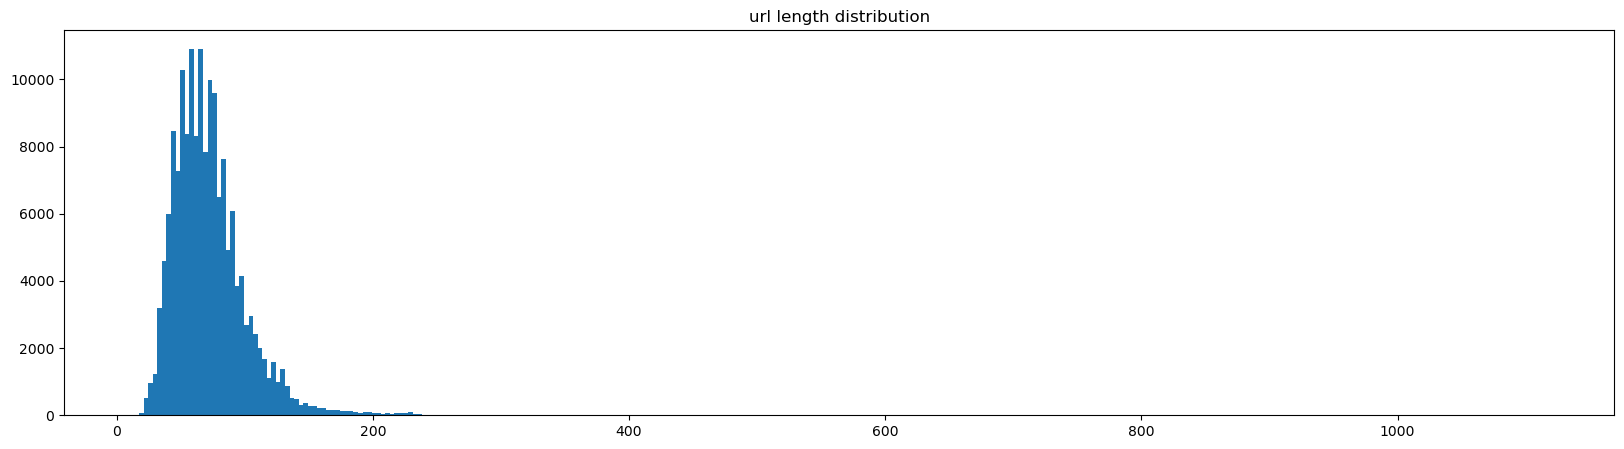

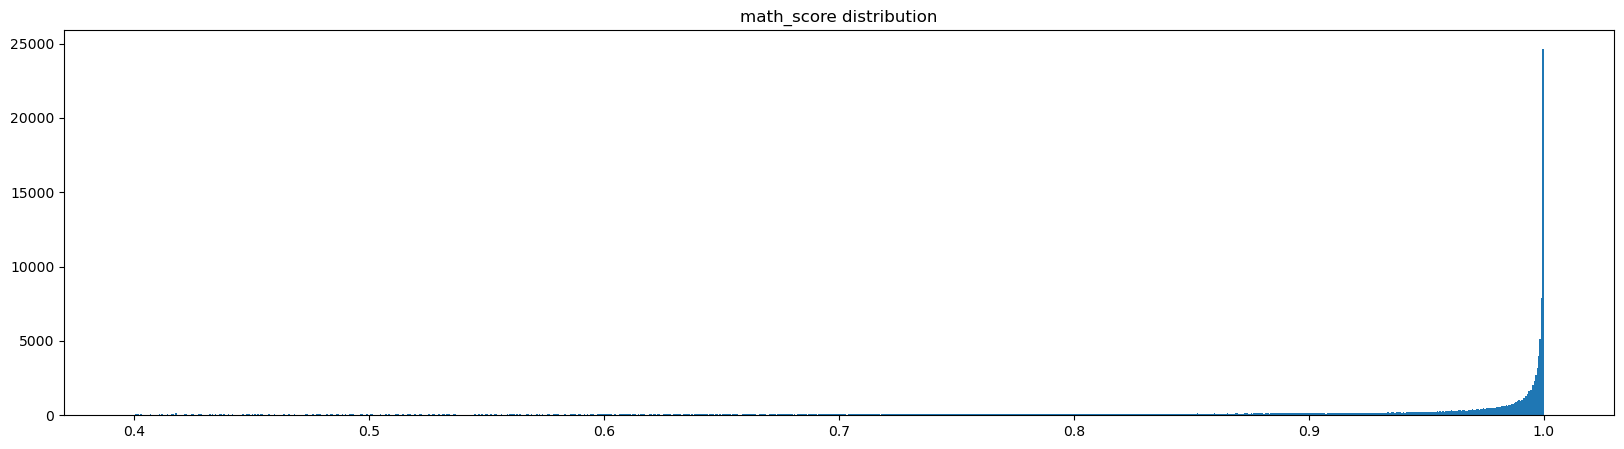

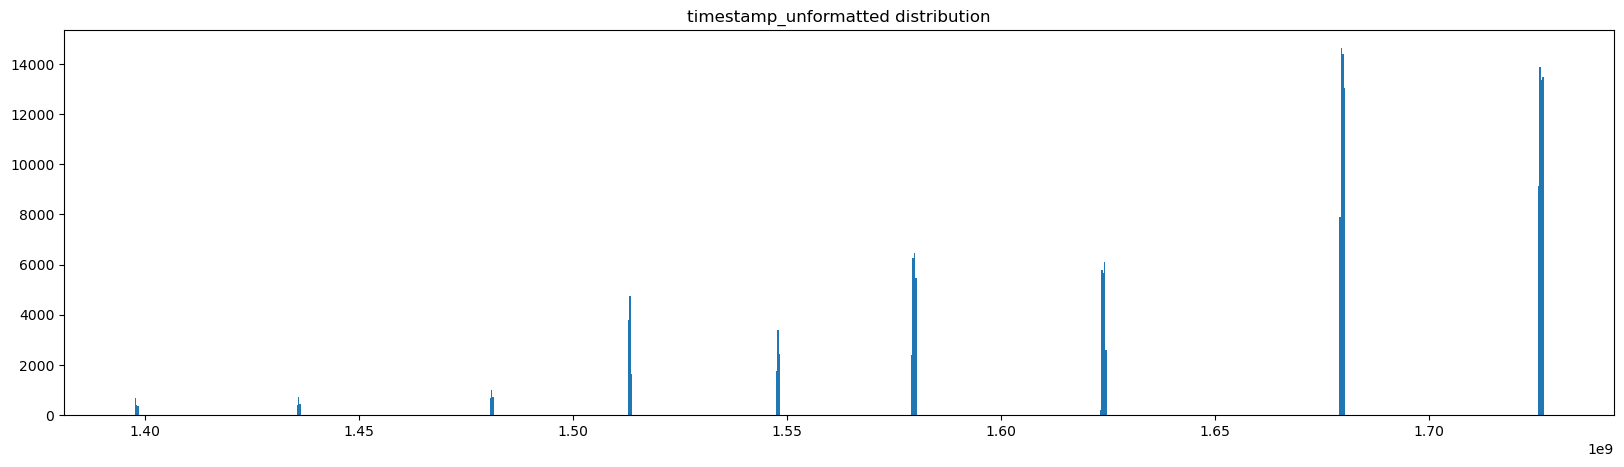

In [12]:
megamath_web_pro = load_data("MegaMath")

megamath_web_pro = megamath_web_pro.add_column(
    "timestamp_unformatted",
    [(datetime.strptime(ts, '%Y-%m-%dT%H:%M:%SZ') - datetime(1970, 1, 1)).total_seconds() for ts in megamath_web_pro["timestamp"]]
)

print_distributions(megamath_web_pro, ['text', 'cc-path', 'domain', 'lang', 'lang_score', 'url', 'math_score', 'timestamp_unformatted'])

### NuminaMath 1.5

Features: ['problem', 'solution', 'answer', 'problem_type', 'question_type', 'problem_is_valid', 'solution_is_valid', 'source', 'synthetic']
Number of samples: 298739
Sample: {
    "answer": "\\text{B}",
    "problem": "Given the specific proposition p: $\\exists x \\in \\mathbb{R}, 2x+1 \\leq 0$. The negation of proposition p is ( )\nA: $\\exists x \\in \\mathbb{R}, 2x+1 > 0$\nB: $\\forall x \\in \\mathbb{R}, 2x+1 > 0$\nC: $\\exists x \\in \\mathbb{R}, 2x+1 \\geq 0$\nD: $\\forall x \\in \\mathbb{R}, 2x+1 \\geq 0$",
    "problem_is_valid": "Yes",
    "problem_type": "Algebra",
    "question_type": "MCQ",
    "solution": "According to the problem, p: $\\exists x \\in \\mathbb{R}, 2x+1 \\leq 0$ is a specific proposition;  \nCombining that a specific proposition is the negation of a universal proposition,  \nits negation is $\\forall x \\in \\mathbb{R}, 2x+1 > 0$;  \nTherefore, the correct choice is $\\boxed{\\text{B}}$.",
    "solution_is_valid": "Yes",
    "source": "cn_k12",
    "synth

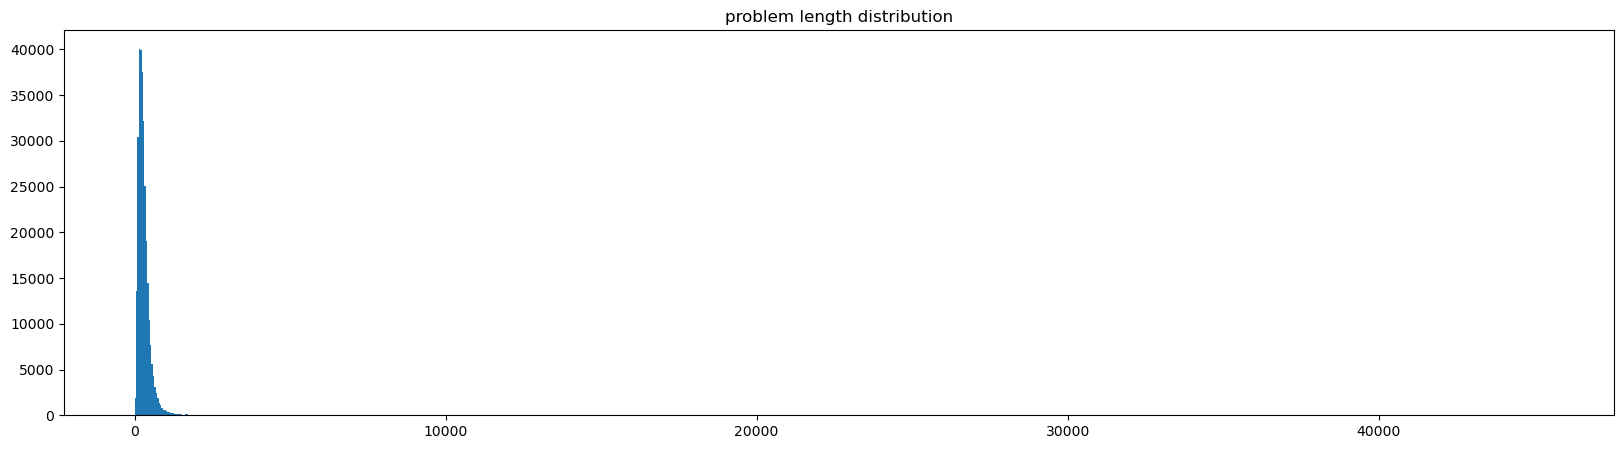

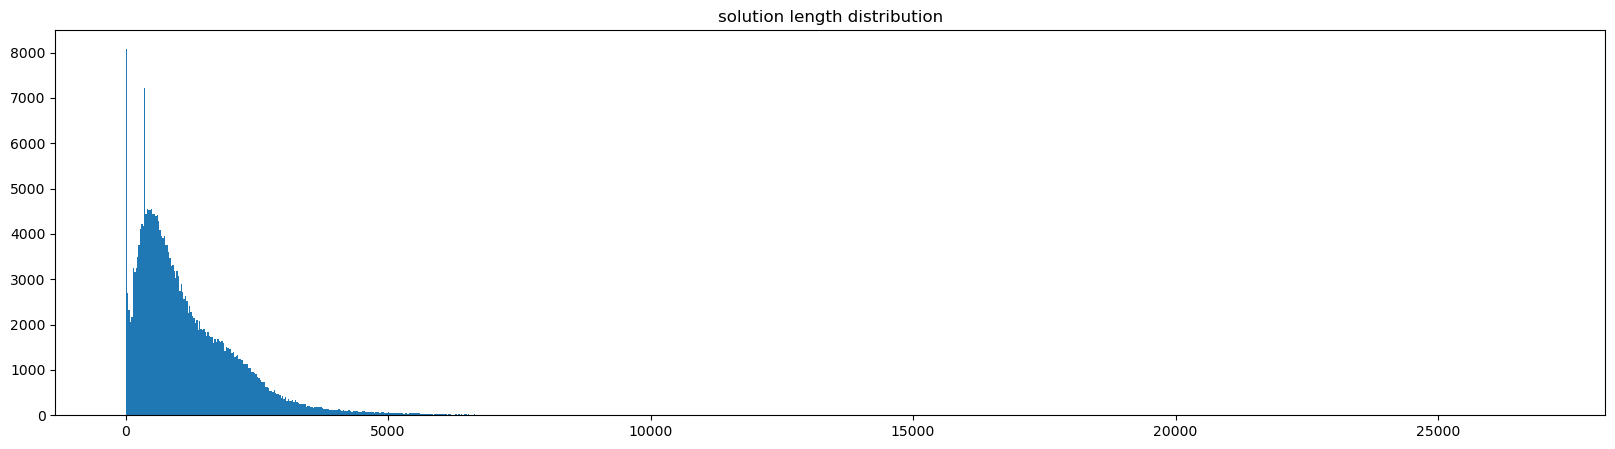

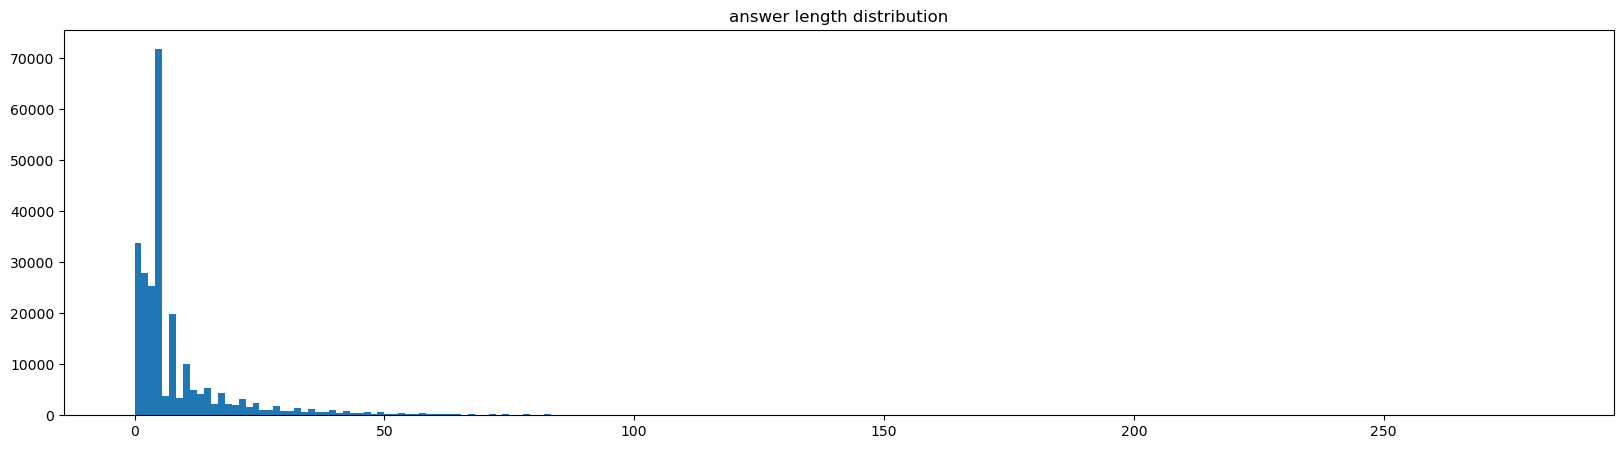

TypeError: '<' not supported between instances of 'str' and 'NoneType'

In [24]:
numina_math_1_5 = load_data("NuminaMath-1.5")
print_distributions(numina_math_1_5, ['problem', 'solution', 'answer', 'problem_type', 'question_type', 'problem_is_valid', 'solution_is_valid', 'source', 'synthetic'])

count_none(numina_math_1_5, "solution")

### Open-R1 Math

In [54]:
open_r1_math = load_data("OpenR1-Math-220k")

Features: ['problem', 'solution', 'answer', 'problem_type', 'question_type', 'source', 'uuid', 'is_reasoning_complete', 'generations', 'correctness_math_verify', 'correctness_llama', 'finish_reasons', 'correctness_count', 'messages']
Number of samples: 9374
Sample: {
    "answer": "7651",
    "correctness_count": 2,
    "correctness_llama": null,
    "correctness_math_verify": [
        true,
        true
    ],
    "finish_reasons": null,
    "generations": [
        "<think>\nOkay, so I need to find the coefficient of \\( x^{150} \\) in the expansion of \\( (1 + x + x^2 + \\cdots + x^{100})^3 \\). Hmm, let's think about how to approach this.\n\nFirst, I remember that when you expand a polynomial raised to a power, the coefficients can often be found using combinations or stars and bars. But this isn't just any polynomial; it's a truncated one that goes up to \\( x^{100} \\). So instead of an infinite series, we have a finite number of terms. That might complicate things a bit.\n\nLet

### OpenThoughts 2

In [56]:
open_thoughts_2 = load_data("OpenThoughts2-1M")

Features: ['conversations', 'question', 'source', 'id']
Number of samples: 30085
Sample: {
    "conversations": [
        {
            "from": "user",
            "value": "translate this code to Go:\n```scala\nimport scala.collection.mutable.PriorityQueue\n\ndef minRefuelingStops(target: Int, startFuel: Int, stations: Array[Array[Int]]): Int = {\n  var pos = 0\n  var fuel = startFuel\n  var stops = 0\n  val pq = PriorityQueue.empty[Int]\n\n  for (i <- 0 until stations.length) {\n    val dist = stations(i)(0) - pos\n    while (fuel < dist) {\n      if (pq.isEmpty) return -1\n      fuel += -pq.dequeue()\n      stops += 1\n    }\n    fuel -= dist\n    pos = stations(i)(0)\n    pq.enqueue(-stations(i)(1))\n  }\n\n  val dist = target - pos\n  while (fuel < dist) {\n    if (pq.isEmpty) return -1\n    fuel += -pq.dequeue()\n    stops += 1\n  }\n\n  stops\n}\n```"
        },
        {
            "from": "assistant",
            "value": "<think>\nOkay, I need to translate this Scala code in